# single run grapher

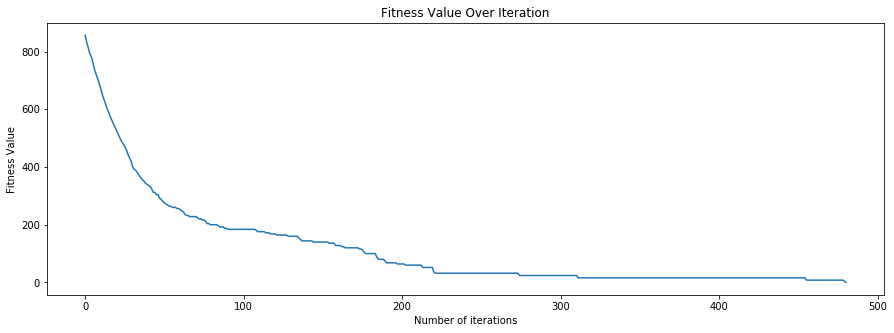

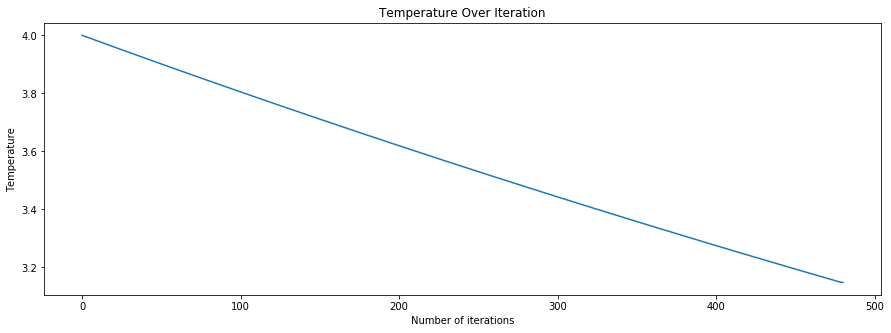

In [55]:
import matplotlib.pyplot as plt
import numpy as np
data = np.genfromtxt('../logs/S_16_100_iteration (2).txt', delimiter=',')
plt.figure(figsize=(15,5))
plt.plot(data[:,0], data[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Fitness Value")
plt.title("Fitness Value Over Iteration")
plt.savefig("../project_report/16_100_iteration.png")
plt.show()

temp = np.genfromtxt('../logs/S_16_100_temperature (2).txt', delimiter=',')
plt.figure(figsize=(15,5))
plt.plot(data[:,0], temp[:,0])
plt.xlabel("Number of iterations")
plt.ylabel("Temperature")
plt.title("Temperature Over Iteration")
plt.savefig("../project_report/16_100_temperature.png")
plt.show()


# Multi-Run Combiner

In [4]:
import numpy as np
empty = 90
num_files = 17
index = 0
data = []
for i in range(num_files):
    temp = np.genfromtxt("../logs/"+str(empty)+"_"+str(i+1)+".txt", delimiter=',')
    for row in temp:
        data.append([index, row[1], row[2]])
        index += 1
data = np.array(data)
print(data.shape)
np.savetxt("../logs/"+str(empty)+".txt", data, delimiter=',')

(106, 3)


# Statistic Finder

In [1]:
import numpy as np
temp = np.genfromtxt("../logs/120.txt", delimiter=',')
size = len(temp)
print(np.mean(temp, axis=0))

[4.95000e+01 1.00000e-02 1.38288e+03]


# Multi-Run Grapher

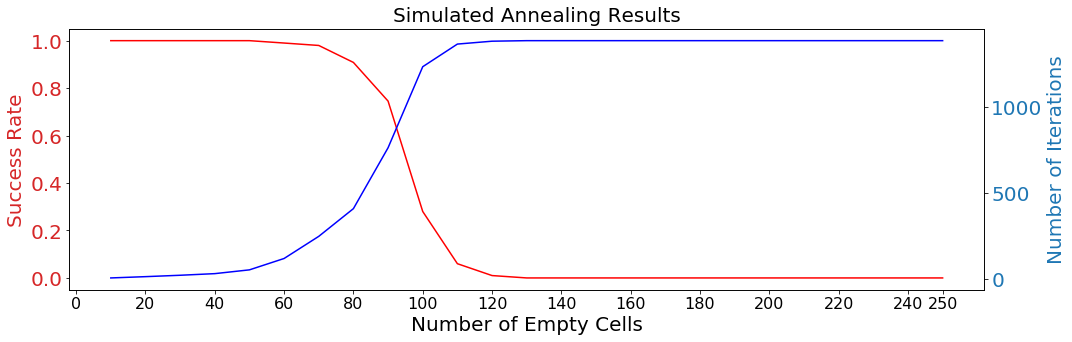

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../logs/important_statistics.txt', delimiter=',')

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Number of Empty Cells', fontsize=20)
ax1.set_ylabel('Success Rate', color=color, fontsize=20)
plt.plot(data[:,0], data[:,1], 'r', label="success rate")
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 250])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Iterations', color=color, fontsize=20)  # we already handled the x-label with ax1
plt.plot(data[:,0], data[:,2], 'b', label="number of iterations")
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figtext(.5,0.9,'Simulated Annealing Results', fontsize=20, ha='center')
plt.subplots_adjust(top=0.88)
#plt.show()


plt.savefig("../project_report/simulated_annealing_results.png")